# Put this directly in src
- there will be the new path src/saved_experiments which you have to delete afterwards
- you need to put a data.csv in the same directory

In [1]:
"""
keras exp
"""

%load_ext autoreload
%autoreload 2


import os
import random
import numpy as np
import pandas as pd
from datetime import datetime
from loader.load_dataset import load_dataset
from loader.Preprocessor import Preprocessor
import utils.settings as settings
from utils.array_operations import split_list_by_percentage

from utils.folder_operations import new_saved_experiment_folder
from evaluation.conf_matrix import create_conf_matrix
from evaluation.text_metrics import create_text_metrics
from evaluation.metrics import accuracy, f1_score
from utils.Windowizer import Windowizer
from sklearn.model_selection import KFold
from utils.Converter import Converter

from models.JensModel import JensModel
from models.MultilaneConv import MultilaneConv
from models.BestPerformerConv import BestPerformerConv
from models.OldLSTM import OldLSTM
from models.MultilaneConvLSTM import MultilaneConvLSTM


settings.init()

# Lib -----------------------------------------------------------
leave_recording_out_split = lambda test_percentage: lambda recordings: split_list_by_percentage(list_to_split=recordings, percentage_to_split=test_percentage)
# leave_recording_out_split(test_percentage=0.3)(recordings)
def leave_person_out_split_idx(recordings, test_person_idx):
    subset_from_condition = lambda condition, recordings: [recording for recording in recordings if condition(recording)] 
    recordings_train = subset_from_condition(lambda recording: recording.subject != test_person_idx, recordings)
    recordings_test = subset_from_condition(lambda recording: recording.subject == test_person_idx, recordings)
    return recordings_train, recordings_test
leave_person_out_split = lambda test_person_idx: lambda recordings: leave_person_out_split_idx(recordings=recordings, test_person_idx=test_person_idx)
# leave_person_out_split(test_person_idx=2)(recordings) # 1-4, TODO: could be random


# Config --------------------------------------------------------------------------------------------------------------
window_size = 30*3
n_classes = 6

data_path = 'data.csv' # os.path.join(settings.opportunity_dataset_csv_path, 'data.csv')
load_recordings = lambda: load_dataset(data_path, 
    label_column_name='ACTIVITY_IDX', 
    recording_idx_name='RECORDING_IDX', 
    column_names_to_ignore=['SUBJECT_IDX', 'MILLISECONDS']
)

preprocess = lambda recordings: Preprocessor().jens_preprocess_with_normalize(recordings)
windowize = lambda recordings: Windowizer(window_size=window_size).jens_windowize(recordings)
convert = lambda windows: Converter(n_classes=n_classes).sonar_convert(windows)
flatten = lambda tuple_list: [item for sublist in tuple_list for item in sublist]
test_train_split = lambda recordings: leave_recording_out_split(test_percentage=0.3)(recordings)


# Load data
recordings = load_recordings()

random.seed(72727277235074) # 1678978086101
random.shuffle(recordings)

# Preprocessing
recordings = preprocess(recordings)

# Test Train Split
recordings_train, recordings_test = test_train_split(recordings)

# Windowize
windows_train, windows_test = windowize(recordings_train), windowize(recordings_test)

# Convert
X_train, y_train, X_test, y_test = tuple(flatten(map(convert, [windows_train, windows_test])))

Will read dataset from data.csv
Filled 13959 NA values in column IMU-BACK-accX
Filled 13959 NA values in column IMU-BACK-accY
Filled 13959 NA values in column IMU-BACK-accZ
Filled 13959 NA values in column IMU-BACK-Quaternion1
Filled 13959 NA values in column IMU-BACK-Quaternion2
Filled 13959 NA values in column IMU-BACK-Quaternion3
Filled 13959 NA values in column IMU-BACK-Quaternion4
Filled 13959 NA values in column IMU-RLA-accX
Filled 13959 NA values in column IMU-RLA-accY
Filled 13959 NA values in column IMU-RLA-accZ
Filled 13959 NA values in column IMU-RLA-Quaternion1
Filled 13959 NA values in column IMU-RLA-Quaternion2
Filled 13959 NA values in column IMU-RLA-Quaternion3
Filled 13959 NA values in column IMU-RLA-Quaternion4
Filled 13959 NA values in column IMU-LLA-accX
Filled 13959 NA values in column IMU-LLA-accY
Filled 13959 NA values in column IMU-LLA-accZ
Filled 13959 NA values in column IMU-LLA-Quaternion1
Filled 13959 NA values in column IMU-LLA-Quaternion2
Filled 13959 NA v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 90, 51)]          0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 90, 32)            10752     
_________________________________________________________________
reshape_43 (Reshape)         (None, 90, 32, 1)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 90, 6, 64)         384       
_________________________________________________________________
reshape_44 (Reshape)         (None, 90, 384)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 90, 32)            53376     
____________________________________

accuracy,▁▅▇▇█
epoch,▁▃▅▆█
loss,█▄▂▂▁
val_accuracy,▄▅▆▁█
val_loss,▃▄▁█▃
accuracy,0.70917
best_epoch,2
best_val_loss,1.42628
epoch,4
loss,0.75673
val_accuracy,0.49068


Epoch 1/5
255/255 [==============================] - 50s 185ms/step - loss: 1.3659 - accuracy: 0.4354 - val_loss: 1.5800 - val_accuracy: 0.2915
Epoch 2/5
255/255 [==============================] - 47s 185ms/step - loss: 1.0784 - accuracy: 0.5839 - val_loss: 1.4612 - val_accuracy: 0.4028
Epoch 3/5
255/255 [==============================] - 46s 181ms/step - loss: 0.9214 - accuracy: 0.6457 - val_loss: 1.2564 - val_accuracy: 0.5132
Epoch 4/5
255/255 [==============================] - 48s 187ms/step - loss: 0.8468 - accuracy: 0.6754 - val_loss: 1.3398 - val_accuracy: 0.4863
Epoch 5/5
255/255 [==============================] - 45s 175ms/step - loss: 0.8246 - accuracy: 0.6834 - val_loss: 1.5141 - val_accuracy: 0.4289


/Users/valentin/github/EvA/src/evaluation/conf_matrix.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f3.show()


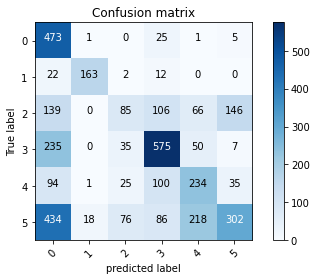

wandb: Network error resolved after 0:00:08.706956, resuming normal operation.


In [30]:
%load_ext autoreload
%autoreload 2

from models.JensModel import JensModel
from models.MultilaneConv import MultilaneConv
from models.BestPerformerConv import BestPerformerConv
from models.OldLSTM import OldLSTM
from models.MultilaneConvLSTM import MultilaneConvLSTM
from models.KirillAlexDeepConvLSTM import KirillAlexDeepConvLSTM
from models.AlternativeDeepConvLSTM import AlternativeDeepConvLSTM
from models.SenselessDeepConvLSTM import SenselessDeepConvLSTM
from models.LeanderDeepConvLSTM import LeanderDeepConvLSTM

experiment_name = "deep-conv-lstm"

currentDT = datetime.now()
currentDT_str = currentDT.strftime("%y-%m-%d_%H-%M-%S_%f")
experiment_name = experiment_name + "-" + currentDT_str

# or JensModel
model = SenselessDeepConvLSTM(
    window_size=window_size, 
    n_features=recordings[0].sensor_frame.shape[1], 
    n_outputs=n_classes, 
    n_epochs=5, 
    learning_rate=0.001, 
    batch_size=32, 
    wandb_config={
        'project': 'all_experiments_project',
        'entity': 'valentindoering',
        'name': experiment_name
    }
)
# learning_rate=0.001
# wandb_project=experiment_name
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

# Create Folder, save model export and evaluations there
experiment_folder_path = new_saved_experiment_folder(experiment_name) # create folder to store results

# model.export(experiment_folder_path) # opt: export model to folder
create_conf_matrix(experiment_folder_path, y_test_pred, y_test)
create_text_metrics(experiment_folder_path, y_test_pred, y_test, [accuracy]) # TODO: at the moment only with one function working! data gets changed (passed by reference) - refactor metric functions